In [46]:
#Heart attack prediction

age: Age of the patient

sex: 1-male,0-female

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable,1-heart attack,0-not having heart attack

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


***Reading The Dataset***

In [48]:
heart=pd.read_csv('/content/heart (1).csv')
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [50]:
#All attributes are of type 'int' except 'oldpeak


***Checking the shape of DataFrame***

In [51]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 303 and number of columns are  14


***Checking for null values***

In [52]:
heart.isnull().sum()/len(heart)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [53]:
#No null values found

In [54]:
#check for duplicate raws
heart[heart.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [55]:
heart.drop_duplicates(keep='first',inplace=True)


In [56]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 302 and number of columns are  14


In [57]:
import plotly.express as px
px.imshow(heart.corr(),title="Correlation Plot of the Heart Failure Prediction")

In [58]:
#Visualization

Number of people having sex as Male are 206 and Number of people having sex as Female are 96


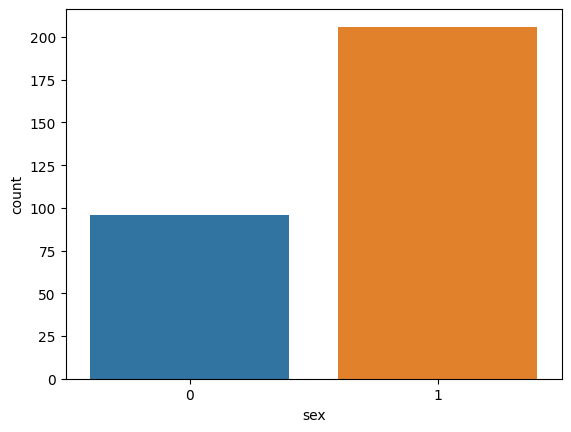

In [59]:
#for gender
x=(heart.sex.value_counts())
print(f'Number of people having sex as Male are {x[1]} and Number of people having sex as Female are {x[0]}')
p = sns.countplot(data=heart, x="sex")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


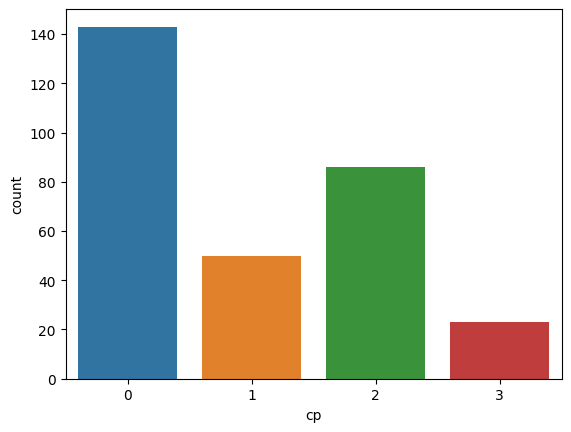

In [60]:
#For chest pain
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

In [61]:
#chest pain of type 0 i.e 'Typical Angina' is the highest.


0    257
1     45
Name: fbs, dtype: int64


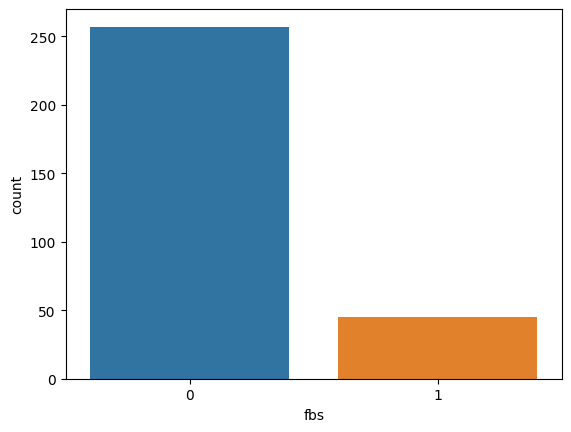

In [62]:
#Forfbs
x=(heart.fbs.value_counts())
print(x)
p = sns.countplot(data=heart, x="fbs")
plt.show()



1    151
0    147
2      4
Name: restecg, dtype: int64


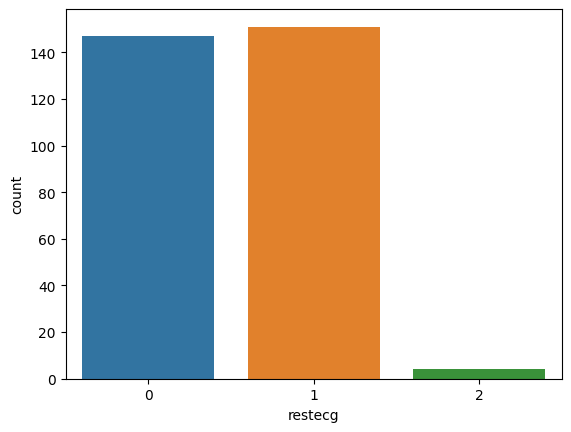

In [63]:
#for ECG
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()



0    203
1     99
Name: exng, dtype: int64


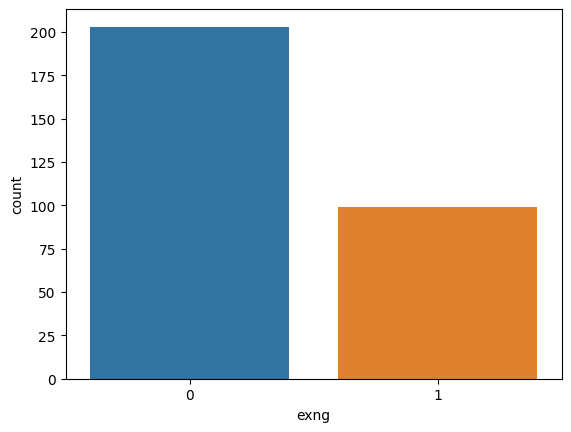

In [64]:
#for Exercise Induced Angina
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()


2    165
3    117
1     18
0      2
Name: thall, dtype: int64


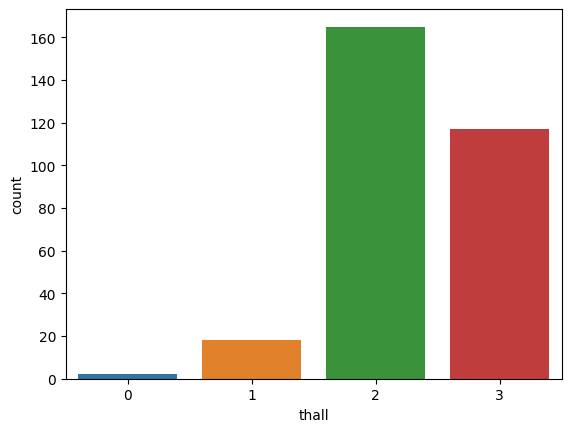

In [65]:
#for Thalium Stress Test
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()


<Figure size 1000x1000 with 0 Axes>

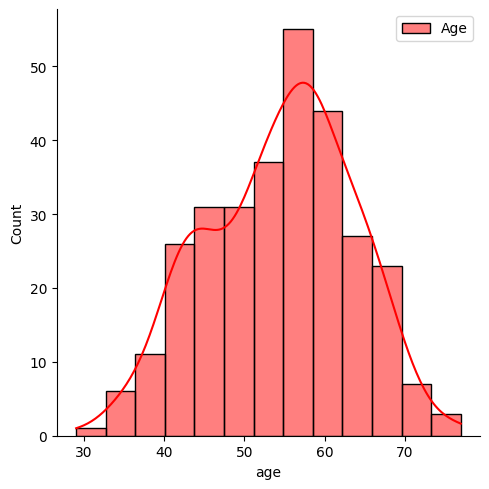

In [66]:

#Density distribution for Age
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

<Figure size 2000x2000 with 0 Axes>

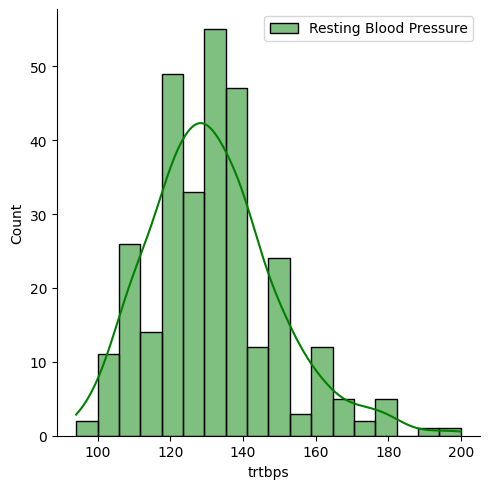

In [67]:

#Density distribution for Resting b p
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

<ipython-input-68-58ab0a45889d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-68-58ab0a45889d>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




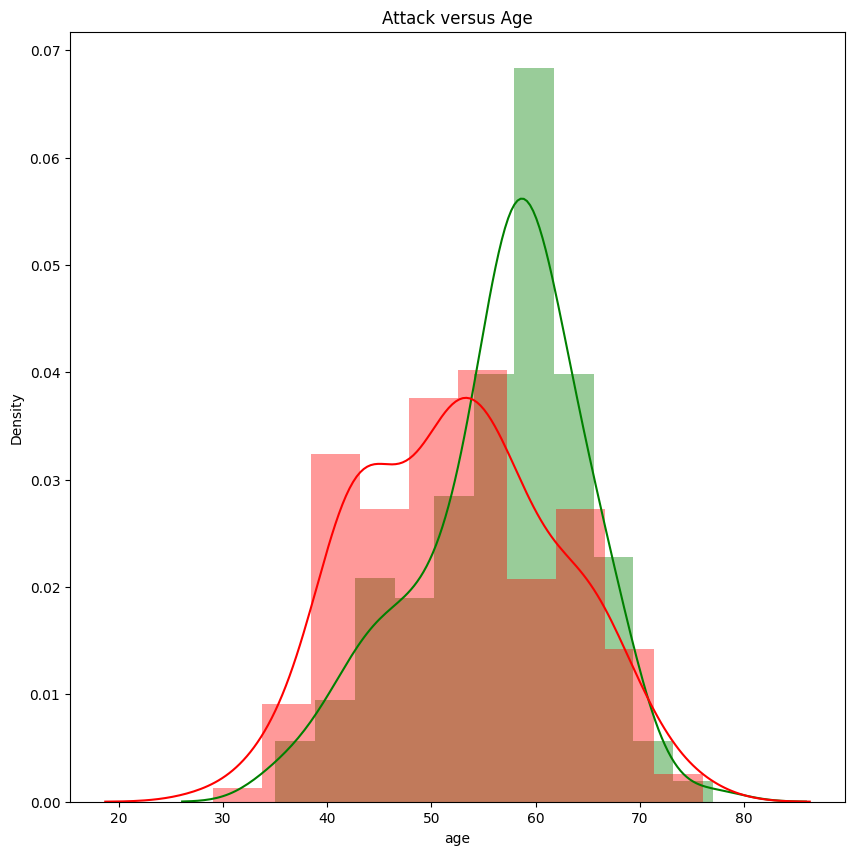

In [68]:
#HA vs Age
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

<ipython-input-69-7525c4dfac2b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-69-7525c4dfac2b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




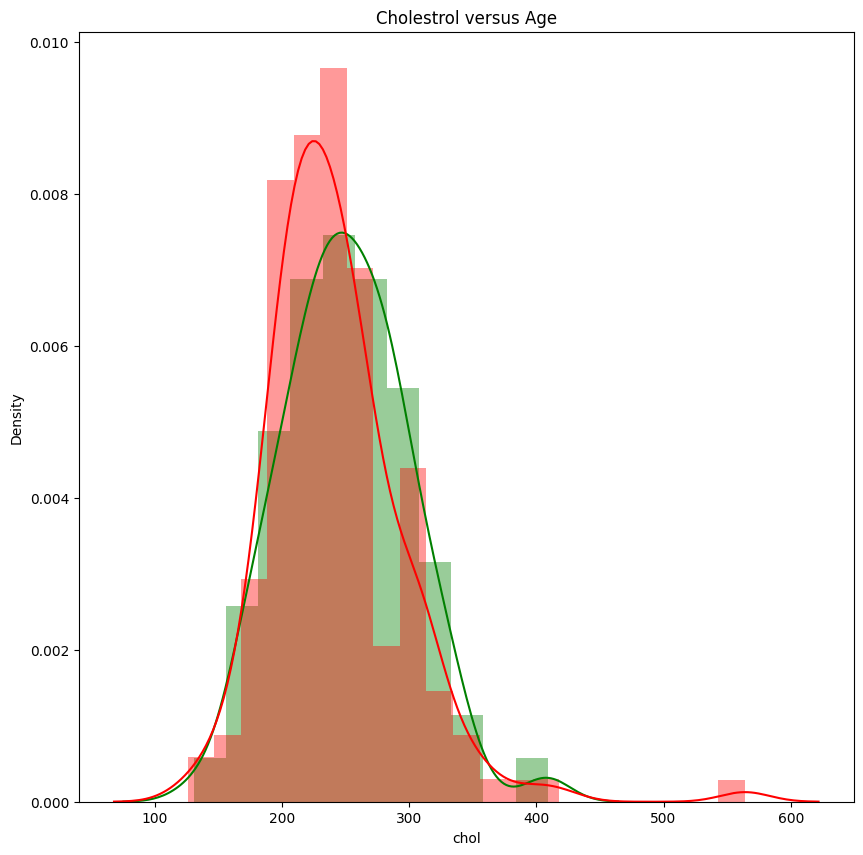

In [69]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()


<ipython-input-70-a9a0dbba6bcd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-70-a9a0dbba6bcd>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




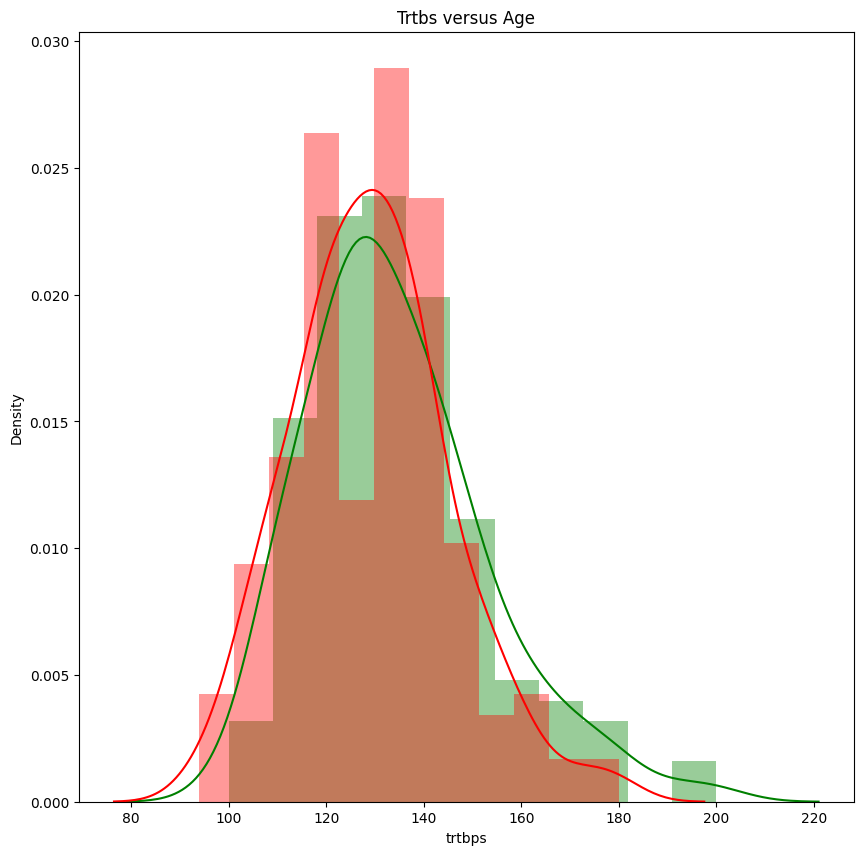

In [70]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

<ipython-input-71-67038b1700e8>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-71-67038b1700e8>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




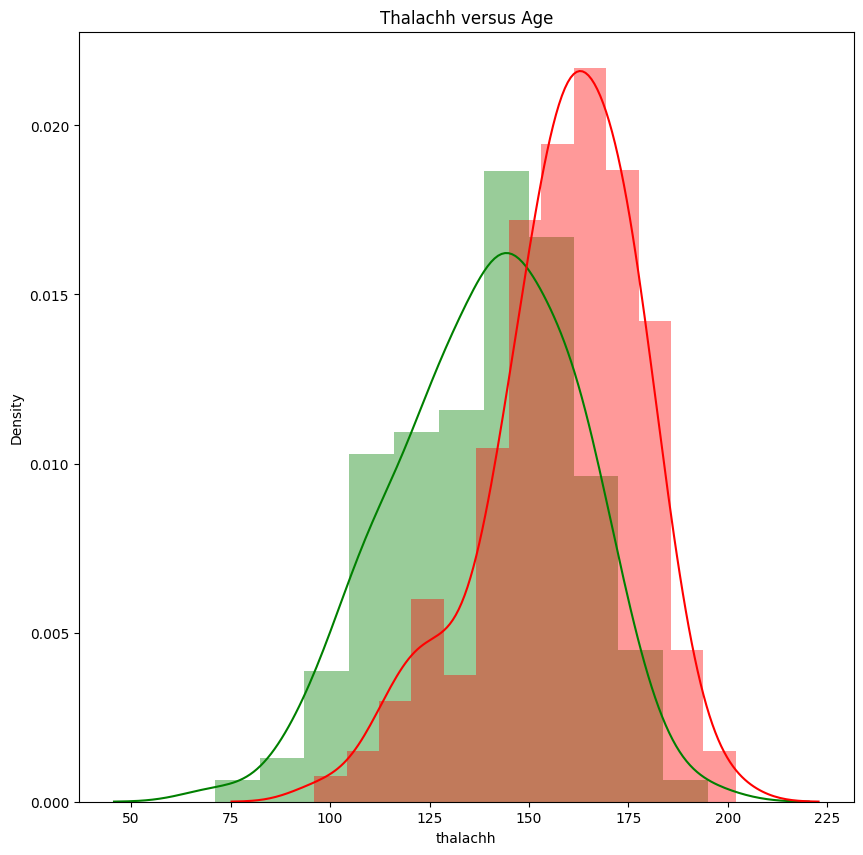

In [71]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()


<Axes: >

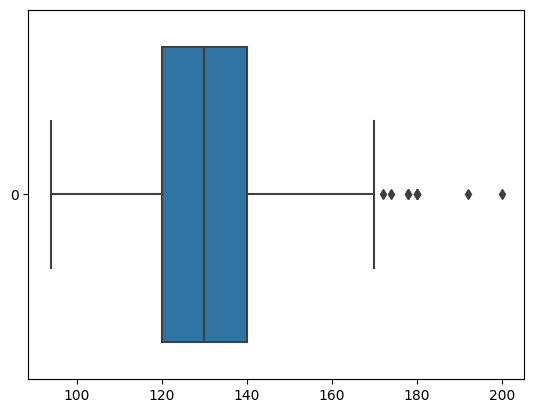

In [72]:
sns.boxplot(data=heart["trtbps"],orient='h')

<Axes: >

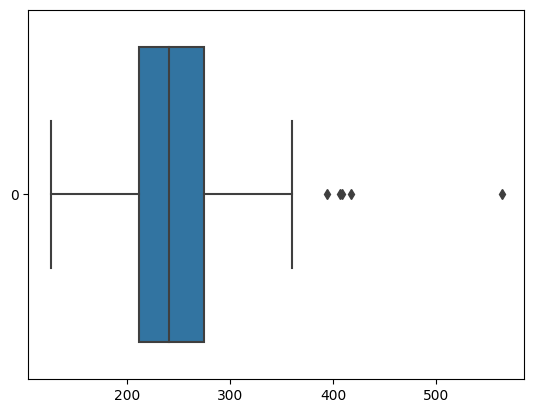

In [73]:
sns.boxplot(data=heart["chol"],orient='h')

In [74]:
outlier=pd.DataFrame()
for col in ["cp","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall"]:
    Q1=heart[col].quantile(0.25)
    Q3=heart[col].quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    outlier[col]=heart[col][(heart[col]<lower_bound) | (heart[col]>upper_bound)]
len(outlier)

9

In [75]:
#got only 3% Outliers using IQR

In [76]:
#heart=heart.drop(outlier.index,axis=0)
#heart.info()

In [77]:
#Data preprocessing

In [78]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [79]:
#Splitting the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [80]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


In [81]:
#Feature Scaling
#scaler=MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

Training Accuracy: 83.40%
Testing Accuracy: 88.52%
Mean Squared Error (MSE): 0.11
Confusion Matrix:
[[23  4]
 [ 3 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



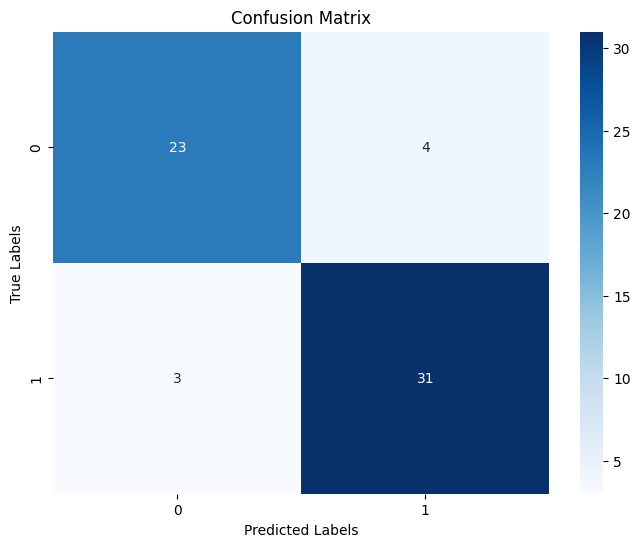

In [83]:
# 1.Logistic Regression

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()

model.fit(x_train_scaled, y_train)

train_predictions = model.predict(x_train_scaled)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

predicted = model.predict(x_test_scaled)

test_accuracy = accuracy_score(y_test, predicted)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))


conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


The training accuracy of Gaussian Naive Bayes model is: 82.57%
The test accuracy of Gaussian Naive Bayes model is: 85.25%
Mean Squared Error (MSE): 0.15
Confusion Matrix:
[[20  7]
 [ 2 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



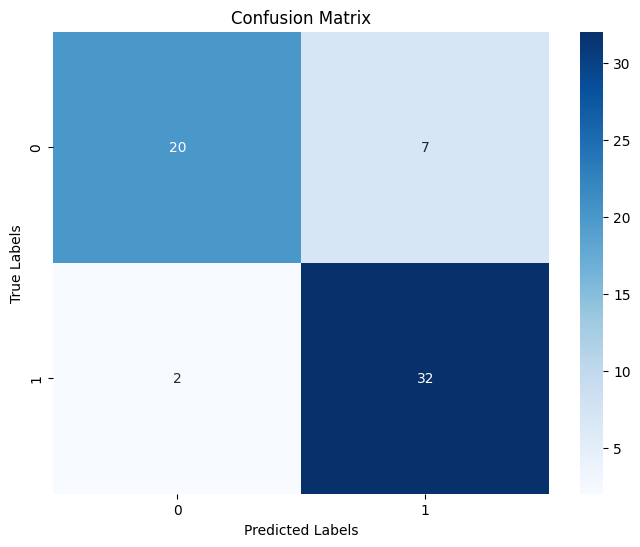

In [84]:
 # 2. Gaussian Naive Bayes
from sklearn.model_selection import train_test_split, GridSearchCV

models = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
model = GridSearchCV(models, param_grid, cv=5)
model.fit(x_train, y_train)

predicted = model.predict(x_test)
train_predicted=model.predict(x_train)
tr_accuracy = accuracy_score(y_train, train_predicted)
print("The training accuracy of Gaussian Naive Bayes model is: {:.2f}%".format(tr_accuracy * 100))
accuracy = accuracy_score(y_test, predicted)
print("The test accuracy of Gaussian Naive Bayes model is: {:.2f}%".format(accuracy * 100))
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))


conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Training Accuracy: 90.46%
Testing Accuracy: 91.80%
Mean Squared Error (MSE): 0.08
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix (Testing Data):
[[25  2]
 [ 3 31]]


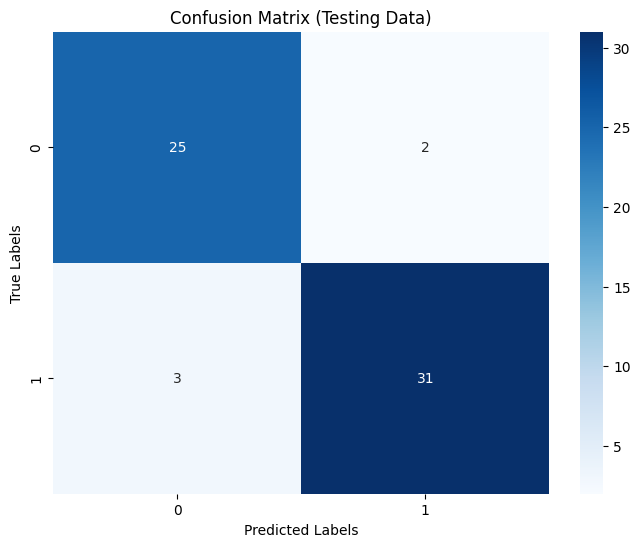

custom prediction:  [0]


In [94]:
# 3. Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC()

model.fit(x_train, y_train)

train_predictions = model.predict(x_train)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))


predicted = model.predict(x_test)


test_accuracy = accuracy_score(y_test, predicted)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)
conf_matrix_test = confusion_matrix(y_test, predicted)
print("Confusion Matrix (Testing Data):")
print(conf_matrix_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



print("custom prediction: ", model.predict([[40, 1, 2, 132, 305, 0, 1, 180, 0, 3.9, 0, 1]]))


Training Accuracy: 96.68%
Testing Accuracy: 78.69%
Mean Squared Error (MSE): 0.21
Confusion Matrix:
[[21  6]
 [ 7 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



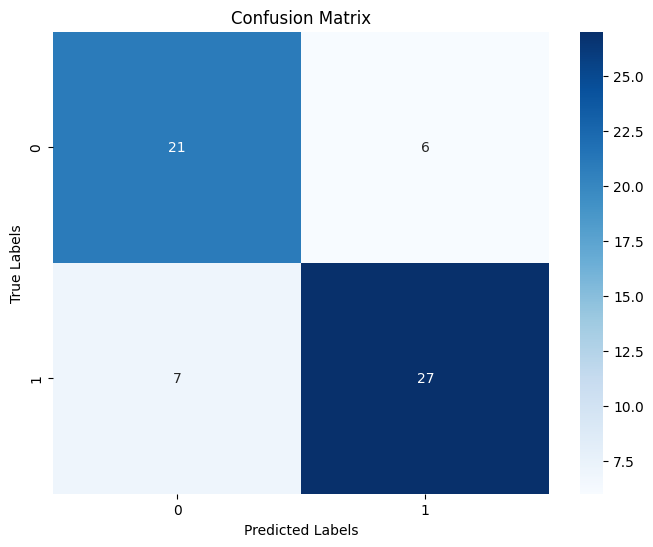

In [86]:
# 4.Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=7, random_state=0)

model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

predicted = model.predict(x_test)

test_accuracy = accuracy_score(y_test, predicted)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Training Accuracy: 98.34%
Testing Accuracy: 85.25%
Mean Squared Error (MSE): 0.11
Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix (Testing Data):
[[23  4]
 [ 5 29]]


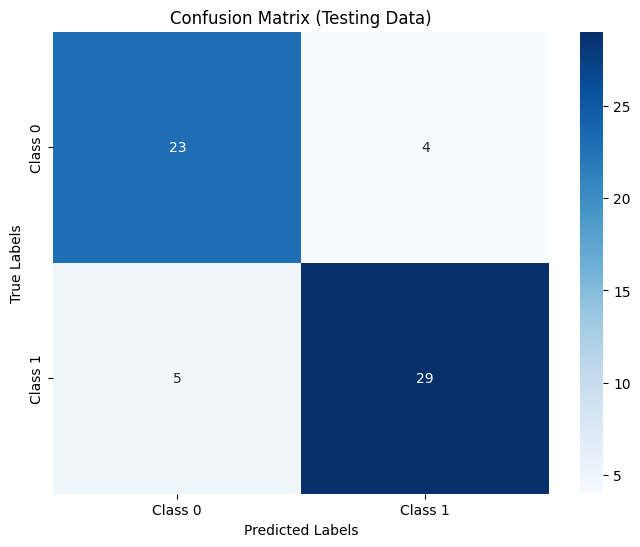

Confusion Matrix (Training Data):
[[107   4]
 [  0 130]]


In [92]:

#5.Random Forest

model = RandomForestRegressor(max_depth=10, random_state=0)

model.fit(x_train, y_train)

predicted = model.predict(x_test)

predicted_classes = [1 if pred > 0.5 else 0 for pred in predicted]

accuracy = accuracy_score(y_test, predicted_classes)

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=5)

model.fit(x_train, y_train)

train_predictions = model.predict(x_train)

train_predicted_classes = [1 if pred > 0.5 else 0 for pred in train_predictions]

train_accuracy = accuracy_score(y_train, train_predicted_classes)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

predicted = model.predict(x_test)

predicted_classes = [1 if pred > 0.5 else 0 for pred in predicted]

test_accuracy = accuracy_score(y_test, predicted_classes)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))


class_report_test = classification_report(y_test, predicted_classes)
print("Classification Report (Testing Data):")
print(class_report_test)
conf_matrix_test = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix (Testing Data):")
print(conf_matrix_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

conf_matrix_train = confusion_matrix(y_train, train_predicted_classes)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)






Confusion Matrix:
[[23  4]
 [ 6 28]]
The test accuracy of KNN is: 83.61%


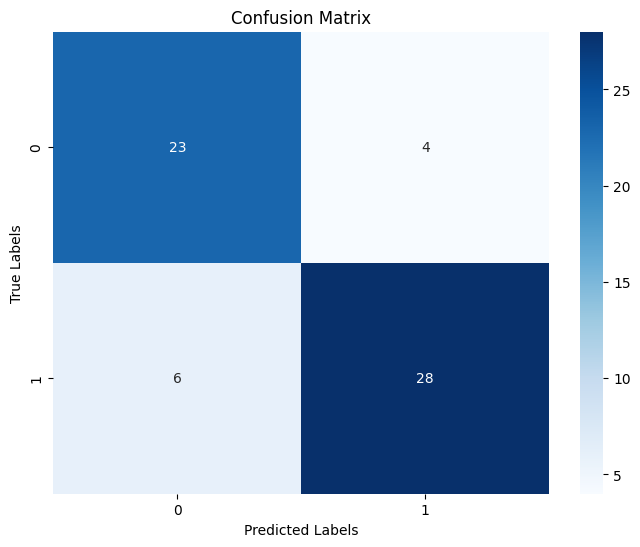

In [88]:
#6.K Nearest Neighbours

model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)

predicted = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, predicted)
print("The test accuracy of KNN is: {:.2f}%".format(accuracy * 100))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Text(0, 0.5, 'Error Rate')

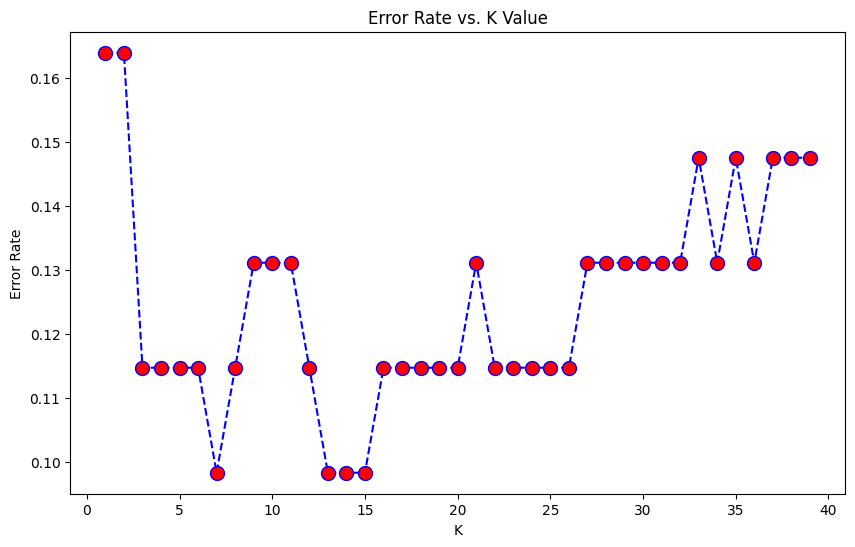

In [89]:
#Optimizing the KNN

error_rate = []

for i in range(1, 40):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [93]:
#With k=7 we get less error

Confusion Matrix :
[[25  2]
 [ 5 29]]

The training accuracy is:  85.47717842323651 %
The test accuracy is :  88.52459016393442 %
Mean Squared Error (MSE): 0.11
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.94      0.85      0.89        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



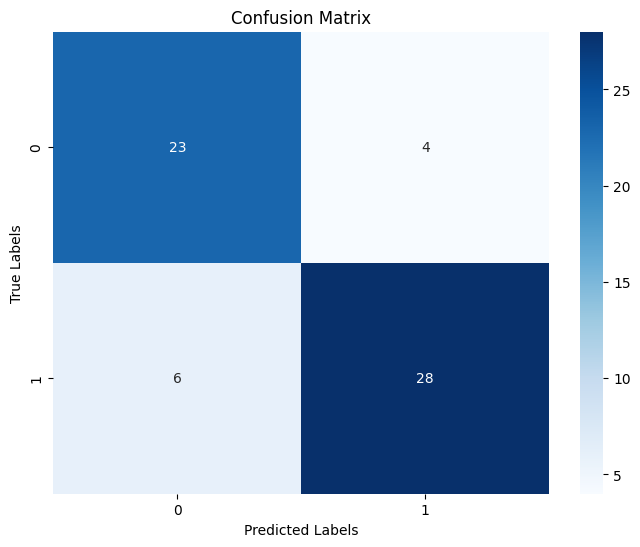

In [90]:
model = KNeighborsClassifier(n_neighbors = 8)

model.fit(x_train, y_train)
predicted = model.predict(x_test)
train_predicted=model.predict(x_train)
tr_acc=accuracy_score(y_train,train_predicted)
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print("The training accuracy is: ", tr_acc*100,"%")
print("The test accuracy is : ", accuracy_score(y_test, predicted.round())*100, "%")
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

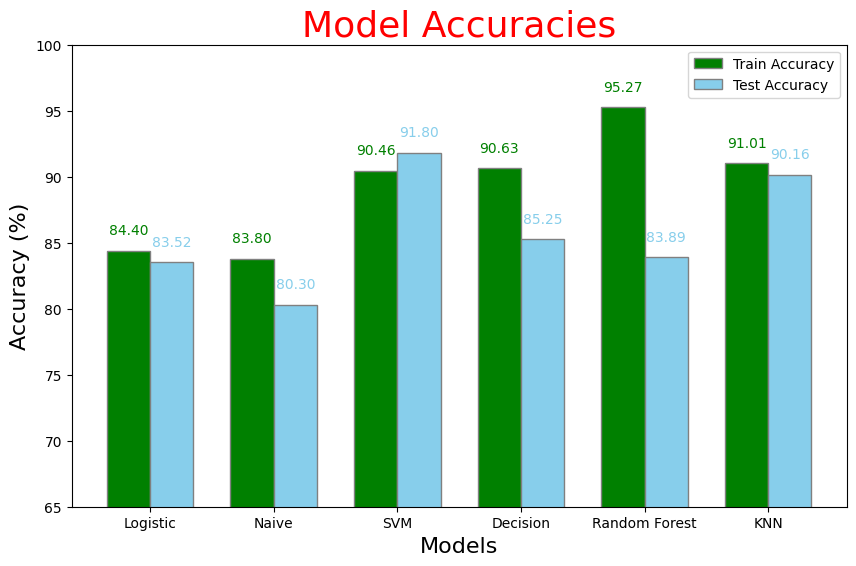

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

models = ['Logistic', 'Naive', 'SVM', 'Decision', 'Random Forest', 'KNN']
bar_width = 0.35

test_accuracies = [ 83.52, 80.3, 91.80, 85.25, 83.89, 90.16]
train_accuracies = [84.40, 83.8, 90.46, 90.63, 95.27, 91.01]

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

plt.bar(r1, train_accuracies, color='green', width=bar_width, edgecolor='grey', label='Train Accuracy')
plt.bar(r2, test_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Test Accuracy')

for i, value in enumerate(train_accuracies):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom', color='green', fontsize=10)

for i, value in enumerate(test_accuracies):
    plt.text(i + bar_width, value + 1, f'{value:.2f}', ha='center', va='bottom', color='skyblue', fontsize=10)

plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.title('Model Accuracies', fontsize=26, color='red')

plt.xticks([r + bar_width/2 for r in range(len(models))], models)

plt.ylim(65, 100)

plt.legend()

plt.show()
